In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
bb = pd.read_csv('breaking-bad.csv', sep=',')

In [7]:
bb.head()

,season,episode,title,year,votes,rating,us-viewers
0,1,1,Pilot,2008,23970,9.0,1.41
1,1,2,Cat's in the Bag...,2008,17267,8.7,1.49
2,1,3,...And the Bag's in the River,2008,16719,8.8,1.08
3,1,4,Cancer Man,2008,16211,8.3,1.09
4,1,5,Gray Matter,2008,15896,8.4,0.97


In [8]:
bb = bb.dropna()

In [10]:
bb_train, bb_test = train_test_split(bb, test_size=0.3, stratify=bb['year'], random_state=42)
print(bb_train.shape, bb_test.shape)

(39, 7) (18, 7)


In [11]:
features= ['rating']
dt_regression = DecisionTreeRegressor(max_depth = 4)
dt_regression.fit(bb_train[features], bb_train['year'])

DecisionTreeRegressor(max_depth=4)

In [12]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree")
    return graph 

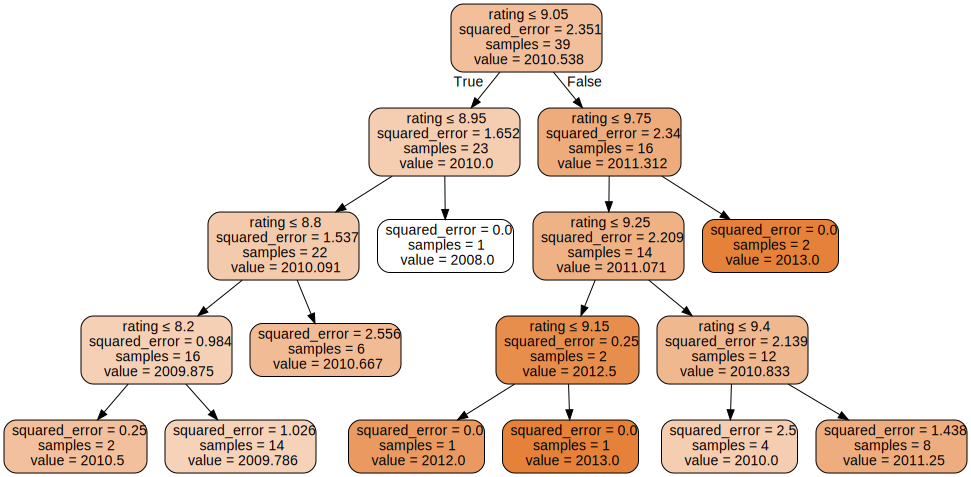

In [13]:
plot_tree_regression(dt_regression, features)

In [14]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [15]:
predictionsOnTrainset = dt_regression.predict(bb_train[features])
predictionsOnTestset = dt_regression.predict(bb_test[features])

In [17]:
rmseTrain = calculate_rmse(predictionsOnTrainset, bb_train['year'])
rmseTest = calculate_rmse(predictionsOnTestset, bb_test['year'])

In [18]:
print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 1.1512588003558648
RMSE on test set 1.505815132713108
